In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
     

In [16]:
df = pd.read_csv('c:\\Гоша\\python\\TIPIS\\project\\data\\divorce.csv',delimiter=';')

In [17]:
df.drop_duplicates(keep="first",inplace = True)

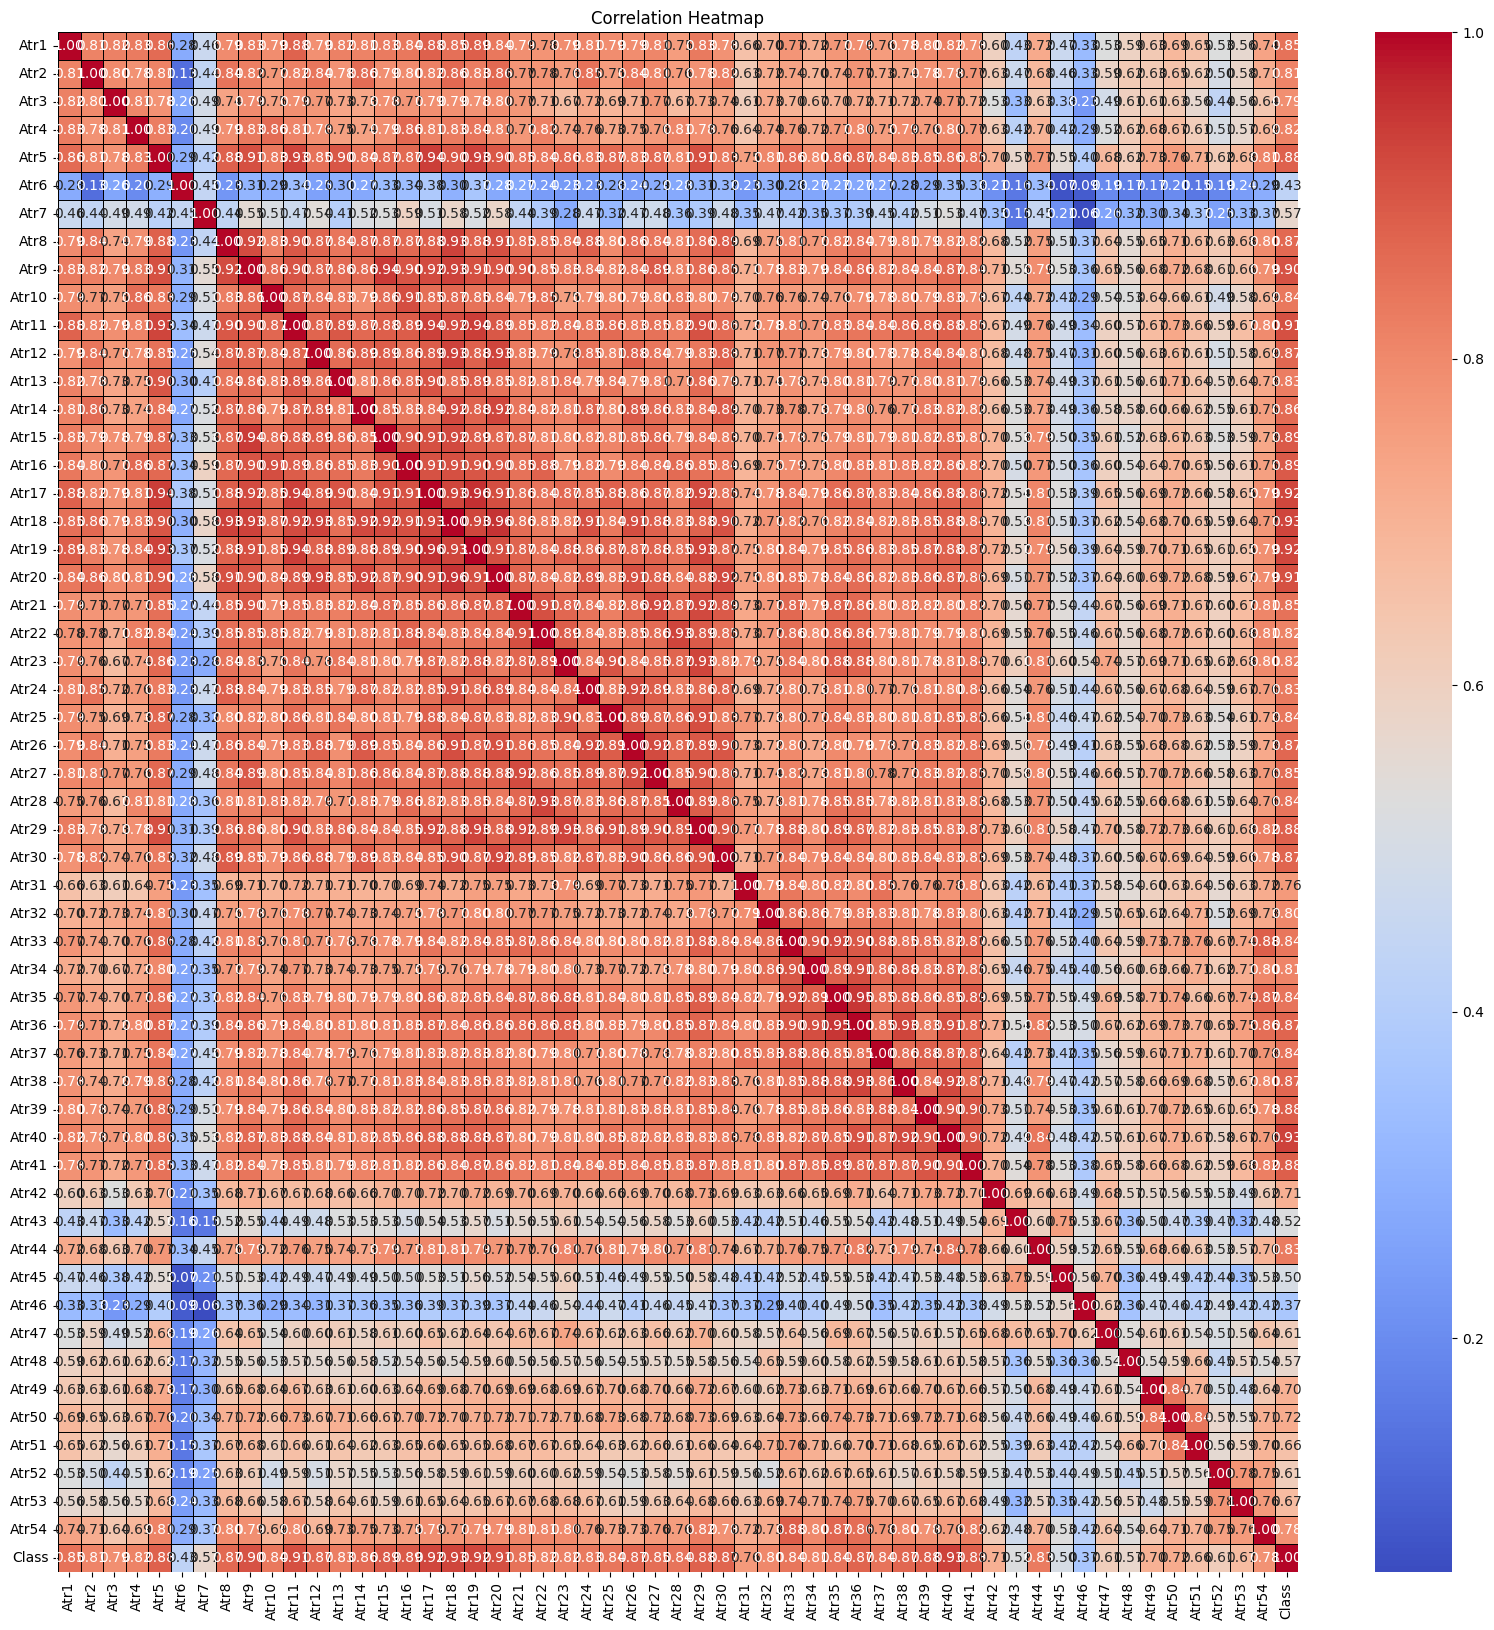

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [20]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=1)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = X_train.Class.values
y_test = X_test.Class.values

del X_train['Class']

del X_test['Class']


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

DecisionTreeClassifier

In [9]:

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import tree

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dtc_predict = clf.predict(X_test)
clf.score(X_test, y_test)


1.0

Perceptron

In [22]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
Perceptron_predict = clf.predict(X_test)
clf.score(X_test, y_test)

0.9333333333333333

LogisticRegression

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
LogisticRegression_predict = clf.predict(X_test)
clf.score(X_test, y_test)

0.9666666666666667

XGBRegressor

In [24]:
import xgboost as xgb

# Создание модели XGBoost для регрессии
clf = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Обучение модели
clf.fit(X_train, y_train)

# Предсказания
xgb_predict = clf.predict(X_test)
clf.score(X_test, y_test)

0.9949586391448975

RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Параметры для случайного поиска
param_dist_rf = {
    'n_estimators': [50, 100, 200, 500],  # Количество деревьев
    'max_depth': [5, 10, 20, 30, 100],    # Глубина деревьев
    'min_samples_split': [2, 5, 10],       # Минимальное количество примеров для разбиения
    'min_samples_leaf': [1, 2, 4],         # Минимальное количество примеров в листе,
    'bootstrap': [True, False]             # Использовать ли бутстрэп (случайную выборку)
}

# Создание модели Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Настройка RandomizedSearchCV
clf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Обучение модели
clf.fit(X_train, y_train)

RandomizedSearchCV_predict = clf.best_estimator_.predict(X_test)
clf.score(X_test, y_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Предсказания для XGBoost
# Оценка моделей
predictions = [RandomizedSearchCV_predict, xgb_predict, LogisticRegression_predict, Perceptron_predict, dtc_predict]
models = ["RandomizedSearchCV", "xgb", "LogisticRegression", "Perceptron", "dtc"]
for prediction, model in zip(predictions, models):    
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    print(f"{model} -  mae: {mae:.4} mse: {mse:.4} r2_score: {r2:.4}")

# Печать результатов для обеих моделей


RandomizedSearchCV -  mae: 0.04879 mse: 0.0235 r2_score: 0.9043
xgb -  mae: 0.009019 mse: 0.001238 r2_score: 0.995
LogisticRegression -  mae: 0.03333 mse: 0.03333 r2_score: 0.8643
Perceptron -  mae: 0.06667 mse: 0.06667 r2_score: 0.7285
dtc -  mae: 0.0 mse: 0.0 r2_score: 1.0


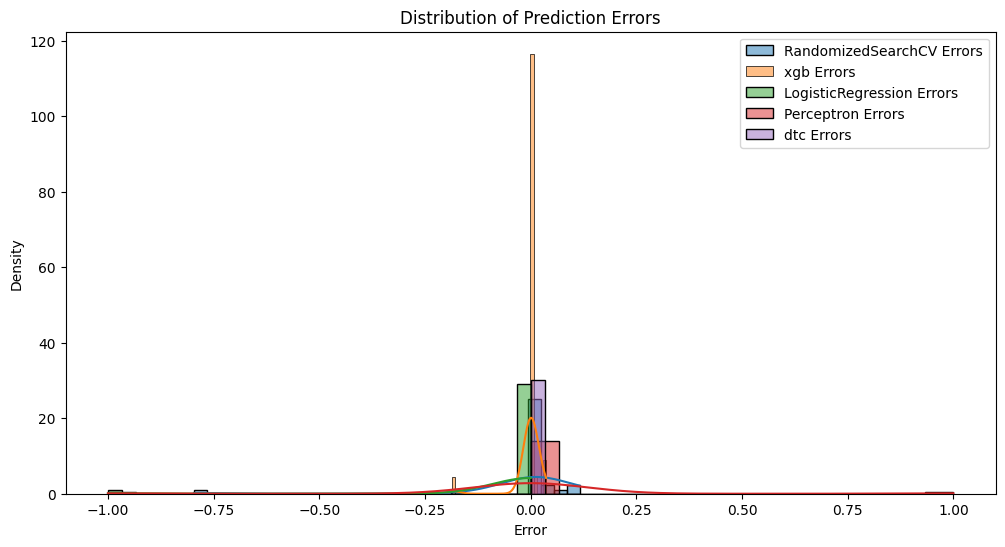

In [15]:
# График распределения ошибок
import matplotlib.pyplot as plt
import seaborn as sns

# Ошибки для XGBoost и Random Forest
plt.figure(figsize=(12, 6))

for prediction, model in zip(predictions, models):  
    errors = prediction - y_test
    sns.histplot(errors, kde=True, label=f'{model} Errors', stat='density', bins=30)
 
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()    

# График распределения ошибок

plt.show()

In [ ]:
import joblib
import xgboost as xgb
# Создание модели XGBoost для регрессии
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Обучение модели
model.fit(df.drop("Class", axis=1), df["Class"])
# Предсказания

joblib.dump(model, 'divorce.pkl')

['divorce.pkl']

: 